# Exploratory Data Analysis (EDA) on Stock Data

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import pandas as pd
URL = "https://money.cnn.com/data/hotstocks/index.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(class_="wsod_dataTable wsod_dataTableBigAlt")
df = pd.read_html(str(results))[0]
df.to_csv('stocks.csv', index= False, header= True)

In [93]:
df

,Company,Price,Change,% Change
0,F Ford Motor Co,19.36,-0.79,-3.92%
1,T AT&T Inc,24.95,0.07,+0.28%
2,PFE Pfizer Inc,49.02,1.72,+3.64%
3,BAC Bank of America Corp,47.23,0.35,+0.75%
4,FCX Freeport-McMoRan Inc,37.52,-1.68,-4.29%
5,GM General Motors Co,59.27,0.65,+1.11%
6,CCL Carnival Corp,23.49,-0.68,-2.81%
7,XOM Exxon Mobil Corp,64.19,-2.17,-3.27%
8,WFC Wells Fargo & Co,50.36,0.47,+0.94%
9,C Citigroup Inc,68.21,-0.24,-0.35%


In [94]:
def change_percent_and_sort(df, col_name):
    df[col_name] = df[col_name].str.replace(r'%', '')
    df[col_name] = df[col_name].astype(float)
    return df.sort_values([col_name], ascending = False)

In [95]:
df_sorted = change_percent_and_sort(df, '%\xa0Change')
df_sorted = df_sorted.rename(columns={'%\xa0Change': 'PercentChange'})
df_sorted

,Company,Price,Change,PercentChange
2,PFE Pfizer Inc,49.02,1.72,3.64
5,GM General Motors Co,59.27,0.65,1.11
8,WFC Wells Fargo & Co,50.36,0.47,0.94
3,BAC Bank of America Corp,47.23,0.35,0.75
1,T AT&T Inc,24.95,0.07,0.28
9,C Citigroup Inc,68.21,-0.24,-0.35
6,CCL Carnival Corp,23.49,-0.68,-2.81
7,XOM Exxon Mobil Corp,64.19,-2.17,-3.27
0,F Ford Motor Co,19.36,-0.79,-3.92
4,FCX Freeport-McMoRan Inc,37.52,-1.68,-4.29


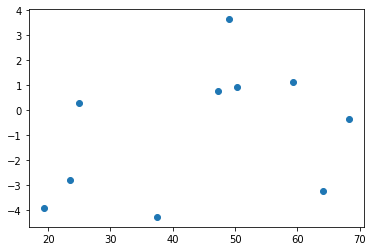

In [96]:
plt.scatter(df_sorted.Price, df_sorted.PercentChange)

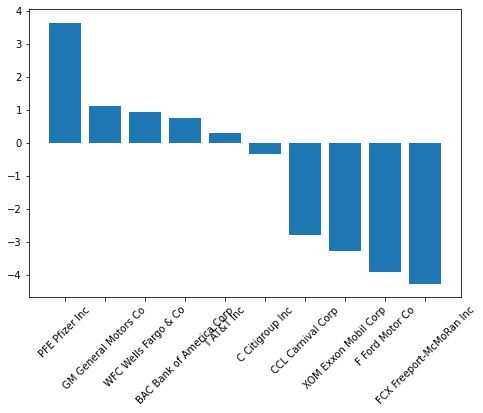

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_sorted['Company'],df_sorted['PercentChange'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [98]:
#pip install lxml

In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
URL = "https://money.cnn.com/data/hotstocks/index.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find_all(class_="wsod_dataTable wsod_dataTableBigAlt")[1]
gain_df = pd.read_html(str(results))[0]
gain_df.to_csv('gain_stocks.csv', index= False, header= True)

In [100]:
gain_df

,Company,Price,Change,% Change
0,MA Mastercard Inc,357.94,13.29,+3.86%
1,VTR Ventas Inc,54.75,1.93,+3.65%
2,PFE Pfizer Inc,49.02,1.72,+3.64%
3,WU Western Union Co,18.55,0.50,+2.77%
4,LH Laboratory Corporation of America H...,283.84,7.29,+2.64%
5,FIS Fidelity National Information Servi...,118.39,2.92,+2.53%
6,NEM Newmont Corporation,58.17,1.42,+2.50%
7,CTVA Corteva Inc,47.68,1.14,+2.45%
8,JCI Johnson Controls International PLC,76.15,1.68,+2.26%
9,K Kellogg Co,63.52,1.27,+2.04%


In [101]:
gain_df = change_percent_and_sort(gain_df, '%\xa0Change')
gain_df = gain_df.rename(columns={'%\xa0Change': 'PercentChange'})
gain_df

,Company,Price,Change,PercentChange
0,MA Mastercard Inc,357.94,13.29,3.86
1,VTR Ventas Inc,54.75,1.93,3.65
2,PFE Pfizer Inc,49.02,1.72,3.64
3,WU Western Union Co,18.55,0.50,2.77
4,LH Laboratory Corporation of America H...,283.84,7.29,2.64
5,FIS Fidelity National Information Servi...,118.39,2.92,2.53
6,NEM Newmont Corporation,58.17,1.42,2.50
7,CTVA Corteva Inc,47.68,1.14,2.45
8,JCI Johnson Controls International PLC,76.15,1.68,2.26
9,K Kellogg Co,63.52,1.27,2.04


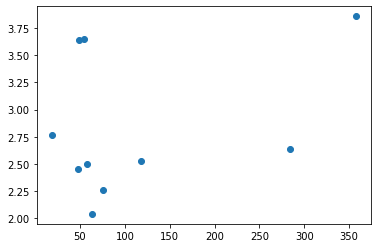

In [103]:
plt.scatter(gain_df.Price, gain_df.PercentChange)

# Sentiment Analysis

In [98]:
#sentiment analysis. 
import numpy as np
from sklearn.preprocessing import StandardScaler

stocks = df_sorted
stocks.head(5)

,Company,Price,Change,PercentChange
5,GE General Electric Co,111.29,2.87,2.65
7,XOM Exxon Mobil Corp,65.48,0.00,0.00
0,F Ford Motor Co,20.12,-0.03,-0.15
9,FCX Freeport-McMoRan Inc,39.20,-0.23,-0.58
8,C Citigroup Inc,67.99,-0.46,-0.67


In [139]:
# use this website to scrape: https://money.cnn.com/data/markets/
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

url = 'https://money.cnn.com/data/markets/'

In [178]:
#store date, time and news headlines 

req = Request(url)
response = urlopen(req)    
html = BeautifulSoup(response)
html = html.find(class_="column right-column")
html = html.find(class_="module")
link_html = html.find_all(class_="summary-hed")

links = []
for link_info in link_html:
    links.append(link_info['href'])
    #print(link_html[0]['href'])
    
html = html.find_all(class_="thumb-caption")

headlines = [] 
for headline in html:
    headlines.append(headline.text.strip())
first = html[0].text.strip()


headlines, links

(['These are the stocks Covid-19 is impacting the most -- and the least',
  "Rivian is America's biggest IPO since Facebook",
  'Move over, bitcoin. Ether is back and nipping at your heels',
  'This new ETF is betting against Cathie Wood and Ark',
  "Evergrande's billionaire founder has been bailing out the business. That can't continue",
  'GE is splitting into three companies'],
 ['https://cnn.com/business/markets/coronavirus',
  'https://www.cnn.com/2021/11/10/investing/premarket-stocks-trading/index.html',
  'https://www.cnn.com/2021/11/10/investing/ethereum-bitcoin-cryptocurrencies/index.html',
  'https://www.cnn.com/2021/11/10/investing/short-cathie-wood-ark-etf/index.html',
  'https://www.cnn.com/2021/11/09/investing/china-property-crisis-evergrande-bail-out-mic-intl-hnk/index.html',
  'https://www.cnn.com/2021/11/09/investing/ge-split/index.html'])

In [300]:
#click on each headline from links array to get date and time
# import calendar 
import re
from datetime import datetime

dates = []
times = []

for link in links:
    req = Request(link)
    response = urlopen(req)    
    html = BeautifulSoup(response)
    if html.find(class_="update-time"):
        time_text = html.find(class_="update-time").text.strip()
        time = re.search('\d+:\d+\s(A|P)M', time_text)[0]
        times.append(time)
        date = re.search('(January|February|March|April|May|June|July|August|September|October|November|December).*', time_text)[0]
        dates.append(date)
    else:
        time = datetime.now().strftime("%I:%M %p")
        times.append(time)
        date = datetime.now().strftime("%B %d, %Y")
        dates.append(date)

dates, times        

(['November 10, 2021',
  'November 10, 2021',
  'November 10, 2021',
  'November 10, 2021',
  'November 10, 2021',
  'November 9, 2021'],
 ['06:00 PM', '4:20 PM', '1:10 PM', '9:39 AM', '2:26 AM', '3:24 PM'])

In [305]:
len(headlines), len(dates), len(times), data

(6,
 6,
 6,
 array([['These are the stocks Covid-19 is impacting the most -- and the least',
         "Rivian is America's biggest IPO since Facebook",
         'Move over, bitcoin. Ether is back and nipping at your heels',
         'This new ETF is betting against Cathie Wood and Ark',
         "Evergrande's billionaire founder has been bailing out the business. That can't continue",
         'GE is splitting into three companies'],
        ['November 10, 2021', 'November 10, 2021', 'November 10, 2021',
         'November 10, 2021', 'November 10, 2021', 'November 9, 2021'],
        ['06:00 PM', '4:20 PM', '1:10 PM', '9:39 AM', '2:26 AM',
         '3:24 PM']], dtype='<U87'))

In [318]:
data = {'Headline': headlines, 'Date': dates, 'Time': times}
parsed_stocks = pd.DataFrame(data)
parsed_stocks

,Headline,Date,Time
0,These are the stocks Covid-19 is impacting the...,"November 10, 2021",06:00 PM
1,Rivian is America's biggest IPO since Facebook,"November 10, 2021",4:20 PM
2,"Move over, bitcoin. Ether is back and nipping ...","November 10, 2021",1:10 PM
3,This new ETF is betting against Cathie Wood an...,"November 10, 2021",9:39 AM
4,Evergrande's billionaire founder has been bail...,"November 10, 2021",2:26 AM
5,GE is splitting into three companies,"November 9, 2021",3:24 PM


In [319]:
# analyze_sentiment = SentimentIntensityAnalyzer()

# scores = parsed_stocks['Headline'].apply(vader.polarity_scores).tolist()
# scores_df = pd.DataFrame(scores)
results = []

for headline in parsed_stocks['Headline']:
    polarity_score = SentimentIntensityAnalyzer().polarity_scores(headline)
    polarity_score['headline'] = headline
    results.append(polarity_score)

results

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'These are the stocks Covid-19 is impacting the most -- and the least'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "Rivian is America's biggest IPO since Facebook"},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Move over, bitcoin. Ether is back and nipping at your heels'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'This new ETF is betting against Cathie Wood and Ark'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "Evergrande's billionaire founder has been bailing out the business. That can't continue"},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'GE is splitting into three companies'}]

In [321]:
parsed_stocks['Score'] = pd.DataFrame(results)['compound']
parsed_stocks

,Headline,Date,Time,Score
0,These are the stocks Covid-19 is impacting the...,"November 10, 2021",06:00 PM,0.0
1,Rivian is America's biggest IPO since Facebook,"November 10, 2021",4:20 PM,0.0
2,"Move over, bitcoin. Ether is back and nipping ...","November 10, 2021",1:10 PM,0.0
3,This new ETF is betting against Cathie Wood an...,"November 10, 2021",9:39 AM,0.0
4,Evergrande's billionaire founder has been bail...,"November 10, 2021",2:26 AM,0.0
5,GE is splitting into three companies,"November 9, 2021",3:24 PM,0.0


In [328]:
parsed_stocks['Date'] = pd.to_datetime(parsed_stocks.Date).dt.date
parsed_stocks

,Headline,Date,Time,Score
0,These are the stocks Covid-19 is impacting the...,2021-11-10,06:00 PM,0.0
1,Rivian is America's biggest IPO since Facebook,2021-11-10,4:20 PM,0.0
2,"Move over, bitcoin. Ether is back and nipping ...",2021-11-10,1:10 PM,0.0
3,This new ETF is betting against Cathie Wood an...,2021-11-10,9:39 AM,0.0
4,Evergrande's billionaire founder has been bail...,2021-11-10,2:26 AM,0.0
5,GE is splitting into three companies,2021-11-09,3:24 PM,0.0


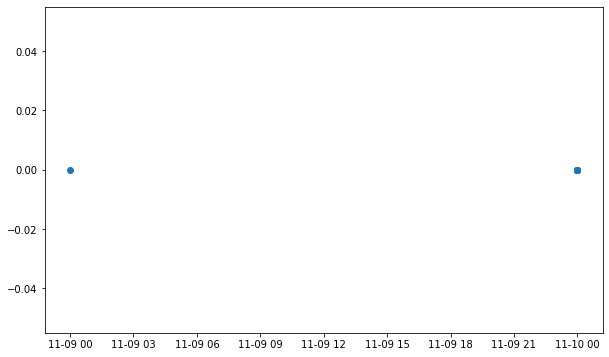

In [330]:
plt.scatter(parsed_stocks['Date'], parsed_stocks['Score'])